In [1]:
#Load data set and preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


df=pd.read_csv(r"C:\Users\USER\Downloads\sonardataset.csv")
print(df.head())
print(df.shape)
print(df.isnull().sum())
print(df.columns)

      x_1     x_2     x_3     x_4     x_5     x_6     x_7     x_8     x_9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

     x_10  ...    x_52    x_53    x_54    x_55    x_56    x_57    x_58  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

     x_59    x_60  Y  
0  0.0090  0.0032  R  
1  0.0052  0.0044  R  
2  0.0095  0.0078  R  


In [2]:
#Assigning feature column and target column
X = df.iloc[:, :-1].to_numpy(dtype='float32')
y = df.iloc[:, -1]

#Data transformation- Label Encoding target column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)   # M → 1, R → 0 (or vice versa)
y.dtype 

dtype('int64')

In [3]:
#Data Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(166, 60) (42, 60) (166,) (42,)


In [4]:
#Convert to TensorFlow
import tensorflow as tf

X_train = tf.expand_dims(X_train, axis=-1)
X_test  = tf.expand_dims(X_test, axis=-1)

In [5]:
#ANN model with 2 hidden layers
#create a model using the sequential API

from keras.models import Sequential
from keras.layers import Dense
import numpy as np

seed=7
np.random.seed(seed)

model= Sequential()
model.add(Dense(32, input_dim=60, activation='relu')) #First layer
model.add(Dense(16, activation='relu')) #Second layer
model.add(Dense(1, activation='sigmoid')) #Third layer or output layer...sigmoid bcoz binary



#compile the model 
model.compile(loss= 'binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])



C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
#fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=10
)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5602 - loss: 0.6853 - val_accuracy: 0.5476 - val_loss: 0.6787
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5904 - loss: 0.6645 - val_accuracy: 0.5714 - val_loss: 0.6616
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6386 - loss: 0.6513 - val_accuracy: 0.7143 - val_loss: 0.6388
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6627 - loss: 0.6368 - val_accuracy: 0.7381 - val_loss: 0.6242
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6687 - loss: 0.6222 - val_accuracy: 0.7619 - val_loss: 0.6003
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6928 - loss: 0.6056 - val_accuracy: 0.7381 - val_loss: 0.5799
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6747 - loss: 0.5875 - val_accuracy: 0.7857 - val_loss: 0.5559
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7289 - loss: 0.5664 - val_accuracy: 0.7619 - val_loss

In [7]:
#Evalution

scores= model.evaluate(X_test,y_test)
print('%s:%.2f%%'%(model.metrics_names[1], scores[1]*100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7857 - loss: 0.3785
compile_metrics:78.57%


In [8]:
model.metrics_names

['loss', 'compile_metrics']

In [9]:
#Visualise

#List all data in history

history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

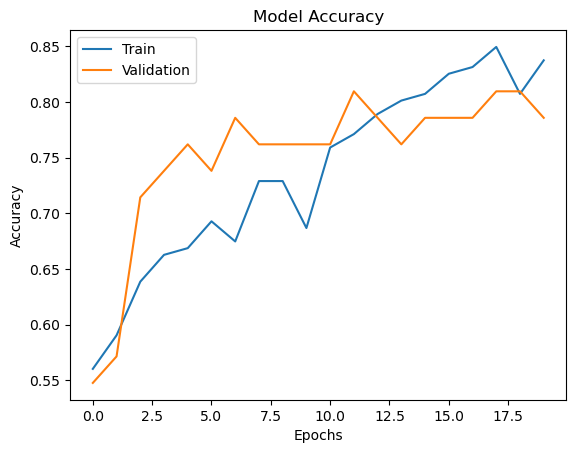

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


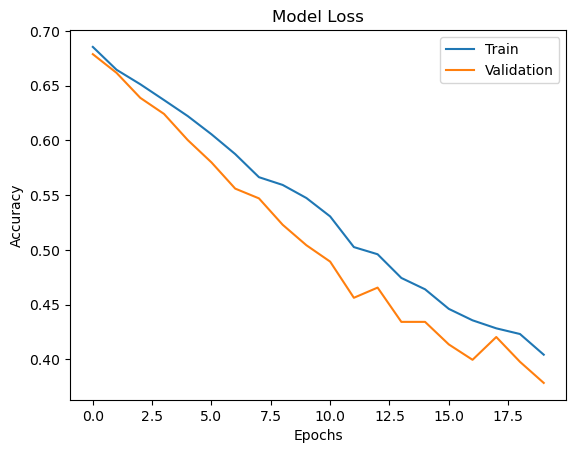

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


In [15]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [16]:
#Hyper parameter tuninig
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load example data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
mlp = MLPClassifier(max_iter=500, random_state=42)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on test set
y_pred = grid_search.predict(X_test)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_ini

In [17]:
#Output: Best Hyperparameters: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}

In [18]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Or get a full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9667
Precision: 0.9722
Recall: 0.9630
F1-score: 0.9659

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

